# Load from Libraries

In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.optimizers import Adam
from matplotlib import pyplot as plt

# Load data

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Preprocessing

In [3]:
y_train_cat = to_categorical(y_train)
y_actuals = y_test
y_test_cat = to_categorical(y_test)

# Build the architecture

In [4]:
model = Sequential()
model.add(Flatten(input_shape=(32, 32, 3)))
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

E:\PycharmProjects\DL-Lab\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [5]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [6]:
result = model.fit(x_train, y_train_cat, epochs=30, batch_size=64, validation_split=0.2)

Epoch 1/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.2380 - loss: 20.1480 - val_accuracy: 0.2985 - val_loss: 2.1654
Epoch 2/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - accuracy: 0.3173 - loss: 2.0105 - val_accuracy: 0.3365 - val_loss: 1.8971
Epoch 3/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - accuracy: 0.3502 - loss: 1.8613 - val_accuracy: 0.3509 - val_loss: 1.8483
Epoch 4/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - accuracy: 0.3702 - loss: 1.7988 - val_accuracy: 0.3561 - val_loss: 1.8666
Epoch 5/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step - accuracy: 0.3776 - loss: 1.7578 - val_accuracy: 0.3822 - val_loss: 1.7714
Epoch 6/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.3810 - loss: 1.7572 - val_accuracy: 0.3681 - val_loss: 1.7739
Epoch 7/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.3866 - loss: 1.7272 - val_accuracy: 0.3544 - val_loss: 1.8113
Epoch 8/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step - accuracy: 0.3968 - loss: 1.6947 -

In [7]:
test_loss, test_accuracy = model.evaluate(x_test, y_test_cat)


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.4605 - loss: 1.5544


In [8]:
predictions = model.predict(x_test)
predictedLabel = np.argmax(predictions, axis=1)
print(f"Predicted label: {(predictedLabel[10])}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Predicted label: 8


Act: [3] 
 Pred: 3
Act: [8] 
 Pred: 8
Act: [8] 
 Pred: 9
Act: [0] 
 Pred: 8
Act: [6] 
 Pred: 4


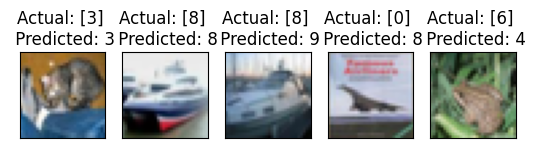

In [9]:
for image in range(5):
    print(f"Act: {y_test[image]} \n Pred: {predictedLabel[image]}")
    plt.subplot(1,5,image+1, title=f"Actual: {y_actuals[image]} \n Predicted: {predictedLabel[image]}")
    plt.imshow(x_test[image])
    plt.xticks([])
    plt.yticks([])
plt.show()

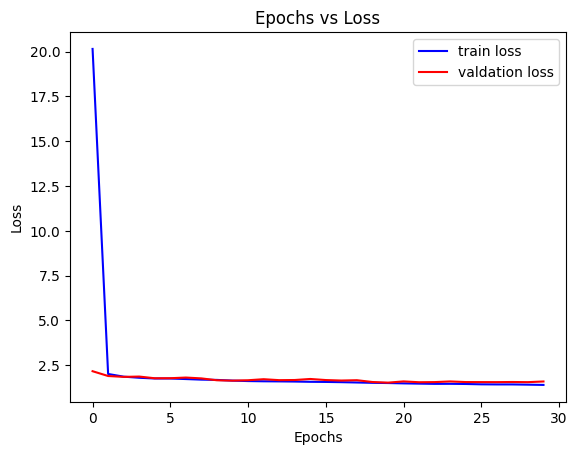

In [12]:
plt.plot(result.history['loss'],label='train loss',color='blue')
plt.plot(result.history['val_loss'],label='valdation loss',color='red')
# plt.xticks(np.arange(1, 50, 2))
plt.xlabel("Epo"
           "chs")
# plt.yticks(np.arange(1, 50, 2))
plt.ylabel("Loss")
plt.title("Epochs vs Loss")
plt.legend()
plt.show()

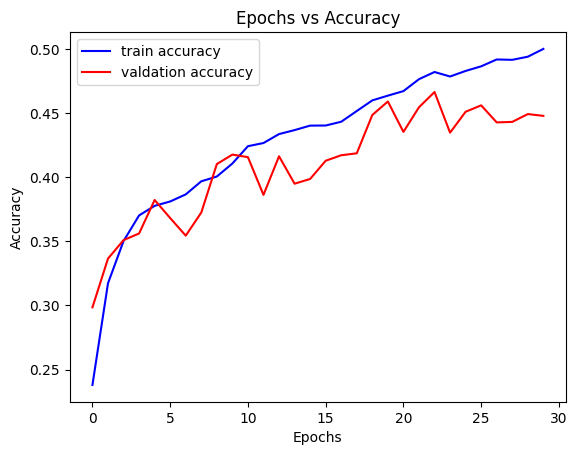

In [13]:
plt.plot(result.history['accuracy'],label='train accuracy',color='blue')
plt.plot(result.history['val_accuracy'],label='valdation accuracy',color='red')
# plt.xticks(np.arange(1, 50, 2))
# plt.yticks(np.arange(1, 50, 2))
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Epochs vs Accuracy")
plt.legend()
plt.show()